<a href="https://colab.research.google.com/github/parthugari-shivakoti/DataAnalysis/blob/main/Population_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
density = 'https://visaguide.world/asia/'
gdp = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_GDP'
response = requests.get(density)
response2 = requests.get(gdp)
print(response2)
print(response)

<Response [200]>
<Response [200]>


In [3]:
den_txt = response.text
gdp_txt = response2.text

In [4]:
print(den_txt[:500])
print("\n")
# print(gdp_txt)

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
	<link rel="profile" href="https://gmpg.org/xfn/11"> 
	<meta name='robots' content='index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1' />
	<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
	
	<!-- This site is optimized with the Yoast SEO plugin v24.2 - https://yoast.com/wordpress/plug




In [5]:
soup = BeautifulSoup(den_txt)

In [34]:
tables = soup.findAll('table')
print(tables[1])

[<table>
<thead>
<tr>
<th>Country</th>
<th>Capital</th>
<th>Area km2</th>
<th>Population (2021)</th>
</tr>
</thead>
<tbody>
<tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>
<tr>
<td>Armenia</td>
<td>Yerevan</td>
<td>29,743</td>
<td>2,968,127</td>
</tr>
<tr>
<td>Azerbaijan</td>
<td>Baku</td>
<td>86,600</td>
<td>10,223,342</td>
</tr>
<tr>
<td>Bahrain</td>
<td>Manama</td>
<td>760</td>
<td>1,748,296</td>
</tr>
<tr>
<td>Bangladesh</td>
<td>Dhaka</td>
<td>147,570</td>
<td>166,303,498</td>
</tr>
<tr>
<td>Bhutan</td>
<td>Thimphu</td>
<td>38,394</td>
<td>779,898</td>
</tr>
<tr>
<td>Brunei</td>
<td>Bandar Seri Begawan</td>
<td>5,765</td>
<td>441,532</td>
</tr>
<tr>
<td>Cambodia</td>
<td>Phnom Penh</td>
<td>181,035</td>
<td>16,946,438</td>
</tr>
<tr>
<td>China (PRC)</td>
<td>Beijing</td>
<td>9,596,961</td>
<td>1,444,216,107</td>
</tr>
<tr>
<td>East Timor</td>
<td>Dili</td>
<td>14,874</td>
<td>1,343,873</td>
</tr>
<tr>
<td>Georgia</td>
<td>Tbilisi</td>
<td>69,700

<ipython-input-34-ee01ec1a7d92>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  tables = soup.findAll('table')


In [7]:
len(tables)

3

In [8]:
columns = tables[1].findAll('th')
# tds = tables[1].findAll('td')
columns

<ipython-input-8-28b781d661cf>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  columns = tables[1].findAll('th')


[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [9]:
# Assuming 'headers' contains the list of <th> elements
columns = [th.text for th in columns]
# values = [td.strip() for td in tds]
# print(header_values)
print(columns)



['Country', 'Capital', 'Area km2', 'Population (2021)']


In [10]:
table_values = tables[1].findAll('td')
table_values = [table_value.text for table_value in table_values]


<ipython-input-10-f11c23f1c5cd>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  table_values = tables[1].findAll('td')


In [11]:
rows = tables[1].findAll('tr')
print(columns,"\n",rows[1])


['Country', 'Capital', 'Area km2', 'Population (2021)'] 
 <tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>


<ipython-input-11-0323bab0c2dc>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  rows = tables[1].findAll('tr')


In [12]:
# one way to extract rows..........
data = []
for row in rows[1:]:
    x=row.findAll('td')
    x = [i.text.strip() for i in x]
    data.append(x)
data[:5]

<ipython-input-12-316d9ca6e79a>:4: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  x=row.findAll('td')


[['Afghanistan', 'Kabul', '652,864', '39,835,428'],
 ['Armenia', 'Yerevan', '29,743', '2,968,127'],
 ['Azerbaijan', 'Baku', '86,600', '10,223,342'],
 ['Bahrain', 'Manama', '760', '1,748,296'],
 ['Bangladesh', 'Dhaka', '147,570', '166,303,498']]

In [35]:
df = pd.DataFrame(data, columns = columns)
df.head(10)

,Country,Capital,Area km2,Population (2021)
0,Afghanistan,Kabul,"652,864","39,835,428"
1,Armenia,Yerevan,"29,743","2,968,127"
2,Azerbaijan,Baku,"86,600","10,223,342"
3,Bahrain,Manama,760,"1,748,296"
4,Bangladesh,Dhaka,"147,570","166,303,498"
5,Bhutan,Thimphu,"38,394","779,898"
6,Brunei,Bandar Seri Begawan,"5,765","441,532"
7,Cambodia,Phnom Penh,"181,035","16,946,438"
8,China (PRC),Beijing,"9,596,961","1,444,216,107"
9,East Timor,Dili,"14,874","1,343,873"


In [36]:
import pandas as pd
import altair as alt

df['Population (2021)'] = pd.to_numeric(df['Population (2021)'].str.replace(',', ''), errors='coerce')
df['Area km2'] = pd.to_numeric(df['Area km2'].str.replace(',', ''), errors='coerce')

df['Population Density'] = df['Population (2021)'] / df['Area km2']

bar_chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Country', sort='-y'),
    y='Population Density',
    tooltip=['Country', 'Population Density']
).properties(title="Population Density by Country",width=800)

hist_chart = alt.Chart(df).mark_bar().encode(
    alt.X("Population Density", bin=True),
    alt.Y("count()", stack=None),
    tooltip=['Population Density']
).properties(title="Distribution of Population Density")

line_chart = alt.Chart(df).mark_line().encode(
    x=alt.X('Country', sort='-y'),
    y='Population Density',
    tooltip=['Country', 'Population Density']
).properties(title="Population Density by Country (Line Chart)",width=800)

bar_chart & hist_chart & line_chart


alt.VConcatChart(...)

In [14]:
# Another way to extract rows........
for row in tables[1].find_all("tr")[1:]:
    cols = [td.text.strip() for td in row.find_all("td")]
    print(cols)

['Afghanistan', 'Kabul', '652,864', '39,835,428']
['Armenia', 'Yerevan', '29,743', '2,968,127']
['Azerbaijan', 'Baku', '86,600', '10,223,342']
['Bahrain', 'Manama', '760', '1,748,296']
['Bangladesh', 'Dhaka', '147,570', '166,303,498']
['Bhutan', 'Thimphu', '38,394', '779,898']
['Brunei', 'Bandar Seri Begawan', '5,765', '441,532']
['Cambodia', 'Phnom Penh', '181,035', '16,946,438']
['China (PRC)', 'Beijing', '9,596,961', '1,444,216,107']
['East Timor', 'Dili', '14,874', '1,343,873']
['Georgia', 'Tbilisi', '69,700', '3,979,765']
['Hong Kong', 'City of Victoria', '2,755', '7,552,810']
['India', 'New Delhi', '3,287,263', '1,393,409,038']
['Indonesia', 'Jakarta', '1,904,569', '276,361,783']
['Iran', 'Tehran', '1,648,195', '85,028,759']
['Iraq', 'Baghdad', '438,317', '41,179,350']
['Israel', 'Jerusalem (disputed)', '20,770', '8,789,774']
['Japan', 'Tokyo', '377,915', '126,050,804']
['Jordan', 'Amman', '89,342', '10,269,021']
['Kazakhstan', 'Nur-Sultan', '2,724,900', '18,994,962']
['Kuwait', 

In [15]:
# headers = [th.text.strip() for th in tables[1].find_all("th")]
data = []
for row in tables[1].find_all("tr")[1:]:
    cols = [td.text.strip() for td in row.find_all("td")]
    data.append(cols)
# print(data[:3])
df = pd.DataFrame(data, columns=columns)
print(df.head(5))

       Country  Capital Area km2 Population (2021)
0  Afghanistan    Kabul  652,864        39,835,428
1      Armenia  Yerevan   29,743         2,968,127
2   Azerbaijan     Baku   86,600        10,223,342
3      Bahrain   Manama      760         1,748,296
4   Bangladesh    Dhaka  147,570       166,303,498


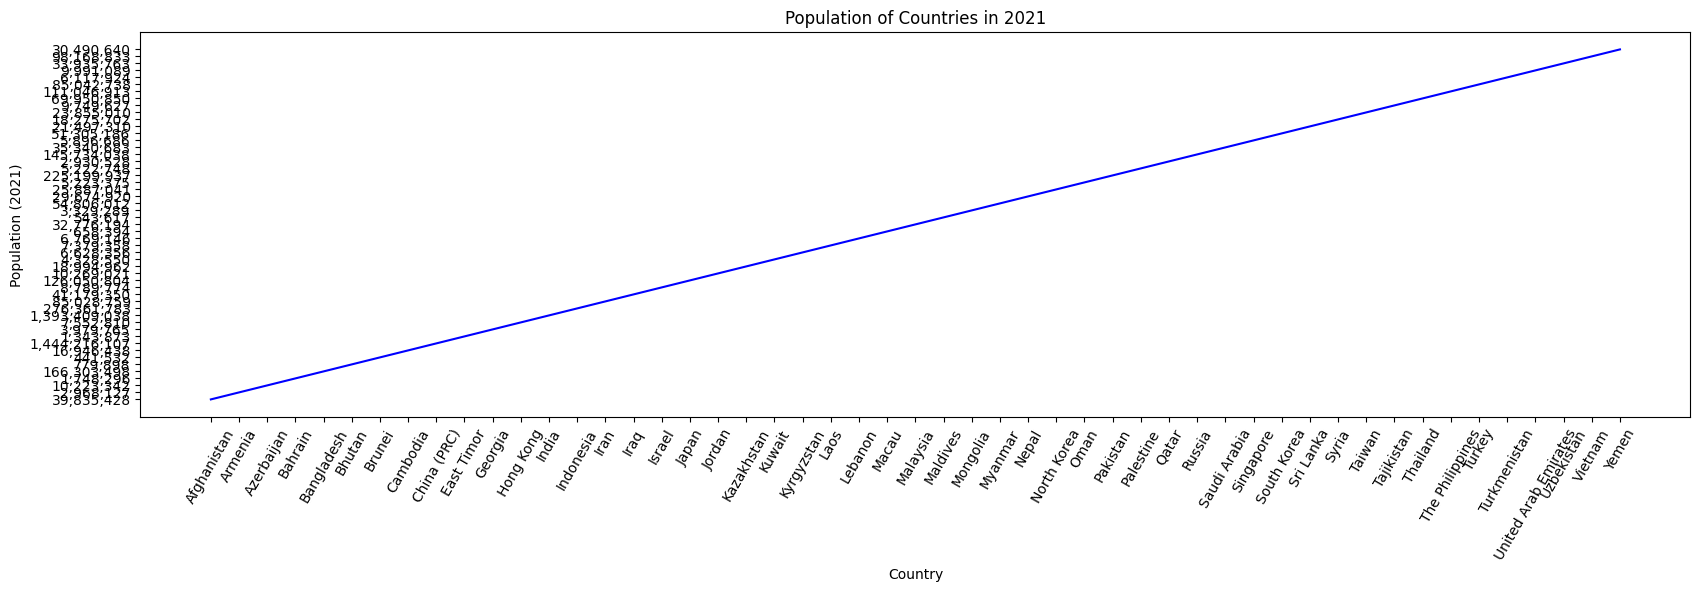

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(df['Country'], df['Population (2021)'], color= 'blue')
plt.xticks(rotation=60)  # Rotates x-axis labels for better readability
plt.xlabel("Country")
plt.ylabel("Population (2021)")
plt.title("Population of Countries in 2021")
plt.show()


In [17]:
print(df[['Area km2', 'Population (2021)']].head(3))

  Area km2 Population (2021)
0  652,864        39,835,428
1   29,743         2,968,127
2   86,600        10,223,342


In [18]:
x = df['Area km2'].str.replace(',','').astype(float)
y = df['Population (2021)'].str.replace(',','').astype(float)
print(x.head(3)," ", y.head(3))

0    652864.0
1     29743.0
2     86600.0
Name: Area km2, dtype: float64   0    39835428.0
1     2968127.0
2    10223342.0
Name: Population (2021), dtype: float64


In [19]:
df['Area km2'] = x
df['Population (2021)'] = y

In [20]:
df.head(5)

,Country,Capital,Area km2,Population (2021)
0,Afghanistan,Kabul,652864.0,39835428.0
1,Armenia,Yerevan,29743.0,2968127.0
2,Azerbaijan,Baku,86600.0,10223342.0
3,Bahrain,Manama,760.0,1748296.0
4,Bangladesh,Dhaka,147570.0,166303498.0


In [21]:
print(df[['Country', 'Population (2021)']].head(3))

       Country  Population (2021)
0  Afghanistan         39835428.0
1      Armenia          2968127.0
2   Azerbaijan         10223342.0


In [22]:
# Calculate population density
df['Population_Density'] = df['Population (2021)'] / df['Area km2']

# Display the dataframe with the new column
print(df[['Country', 'Population_Density']].head(5))


       Country  Population_Density
0  Afghanistan           61.016426
1      Armenia           99.792455
2   Azerbaijan          118.052448
3      Bahrain         2300.389474
4   Bangladesh         1126.946520


In [37]:
df.head(10)

,Country,Capital,Area km2,Population (2021),Population Density
0,Afghanistan,Kabul,652864,39835428,61.016426
1,Armenia,Yerevan,29743,2968127,99.792455
2,Azerbaijan,Baku,86600,10223342,118.052448
3,Bahrain,Manama,760,1748296,2300.389474
4,Bangladesh,Dhaka,147570,166303498,1126.946520
5,Bhutan,Thimphu,38394,779898,20.313018
6,Brunei,Bandar Seri Begawan,5765,441532,76.588378
7,Cambodia,Phnom Penh,181035,16946438,93.608628
8,China (PRC),Beijing,9596961,1444216107,150.486816
9,East Timor,Dili,14874,1343873,90.350477


In [24]:
import seaborn as sns

# Bar Chart (Population Density by Country)

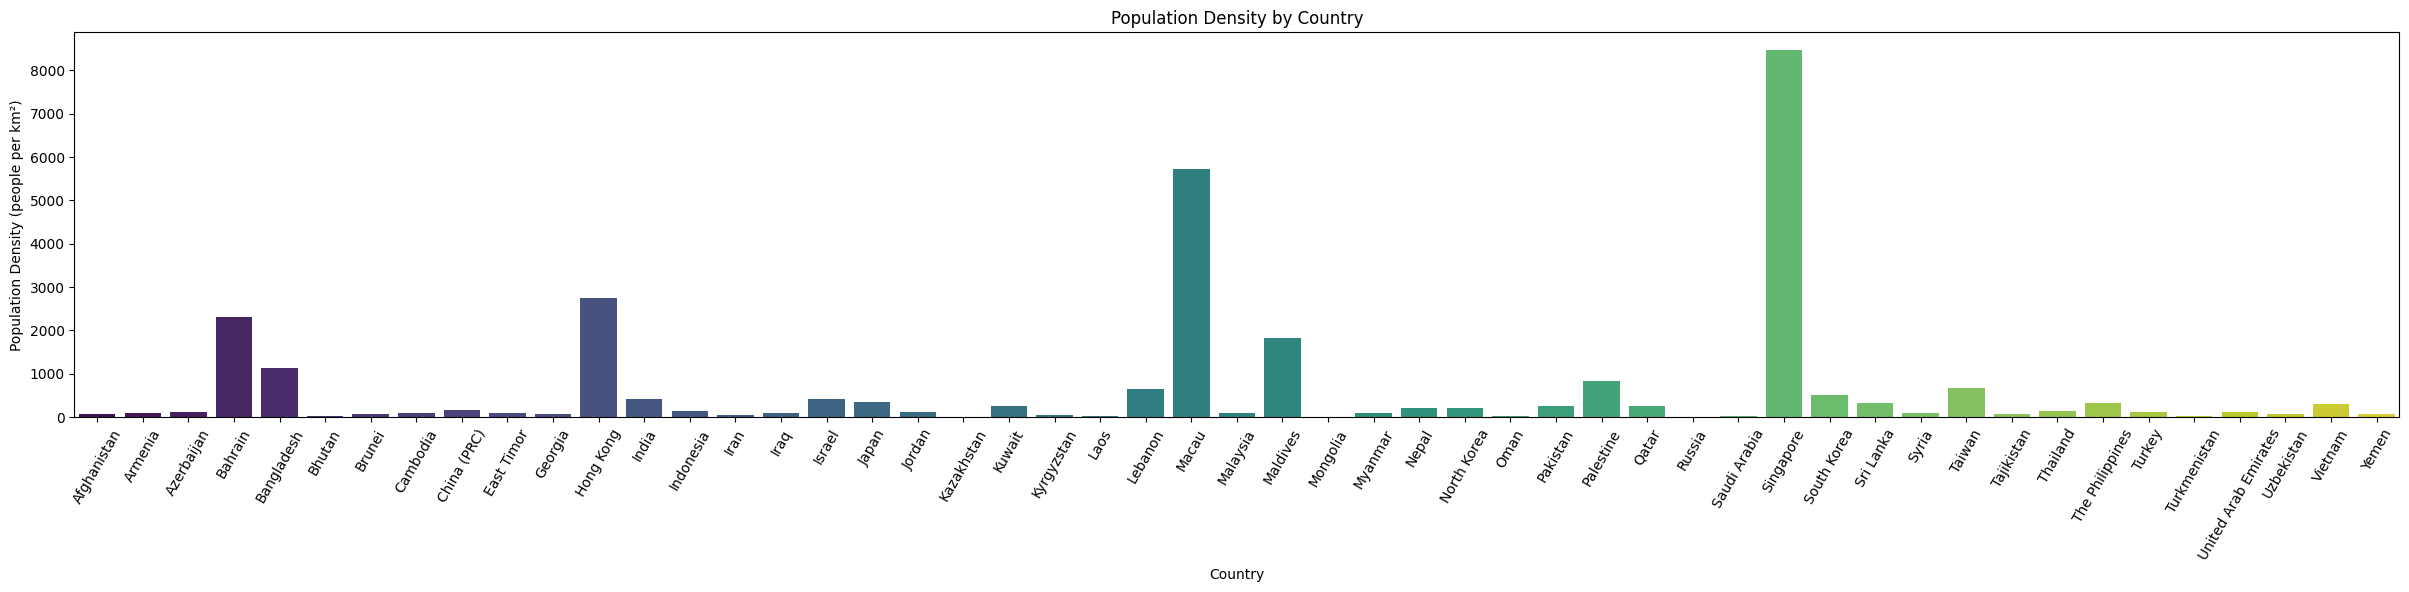

In [25]:
plt.figure(figsize=(30, 5))
sns.barplot(x="Country", y="Population_Density", hue="Country", data=df, palette="viridis", legend=False)
plt.xlabel("Country")
plt.ylabel("Population Density (people per km²)")
plt.title("Population Density by Country")
plt.xticks(rotation=60)
plt.show()


 # Line Graph (Population Density Trend)

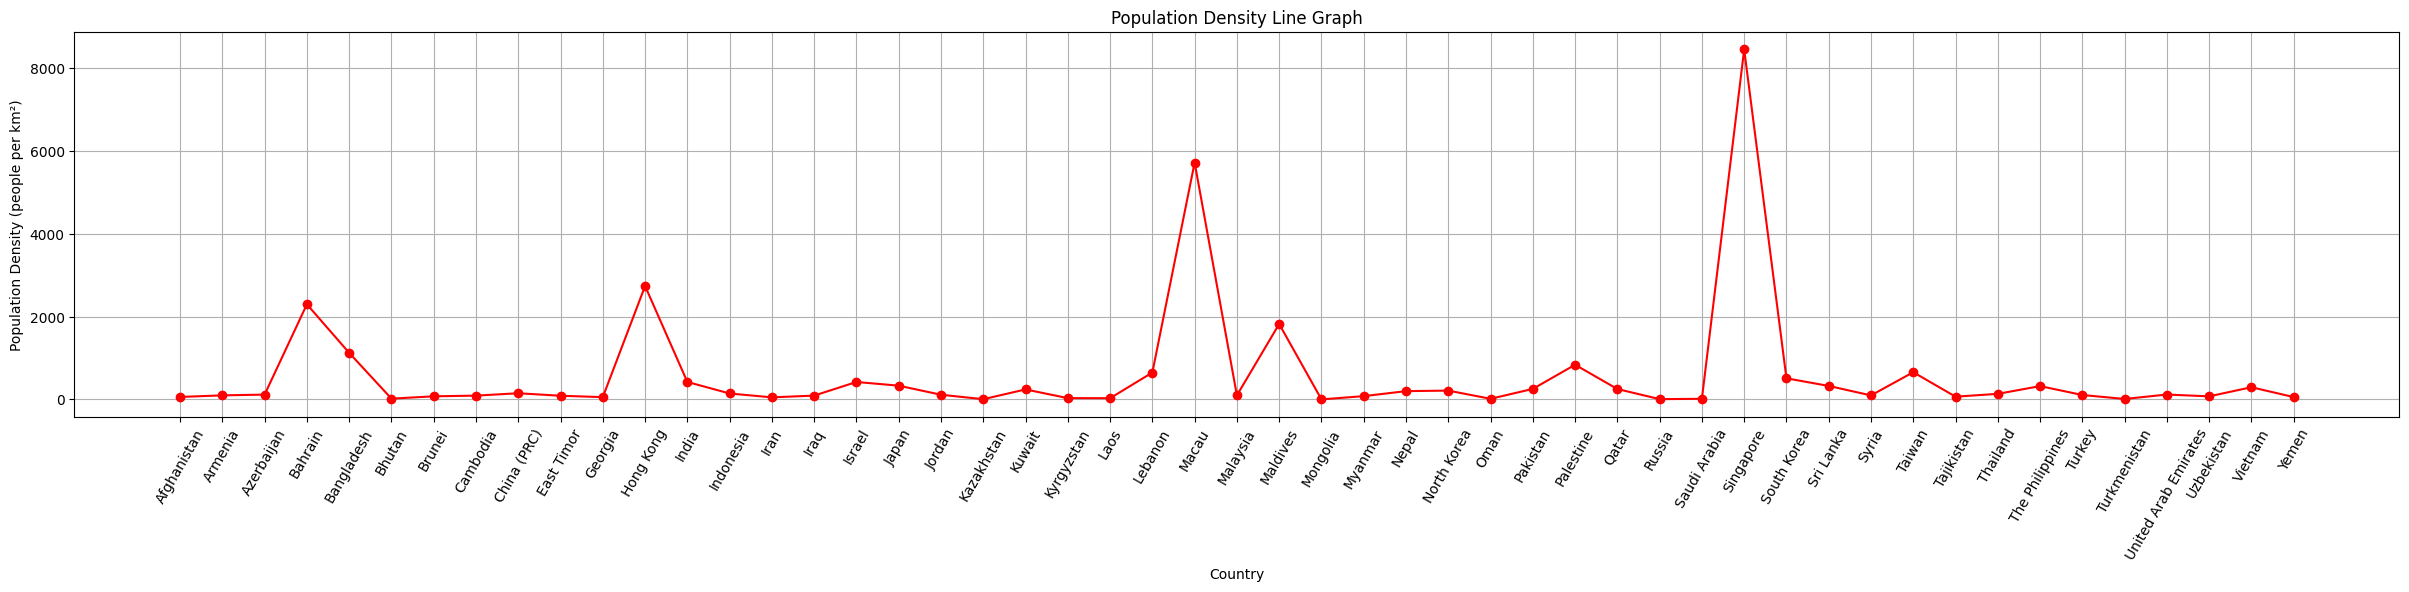

In [26]:
plt.figure(figsize=(30, 5))
plt.plot(df["Country"], df["Population_Density"], marker='o', linestyle='-', color='r')
plt.xlabel("Country")
plt.ylabel("Population Density (people per km²)")
plt.title("Population Density Line Graph")
plt.xticks(rotation=60)
plt.grid()
plt.show()


# Scatter Plot (Country vs. Population Density)

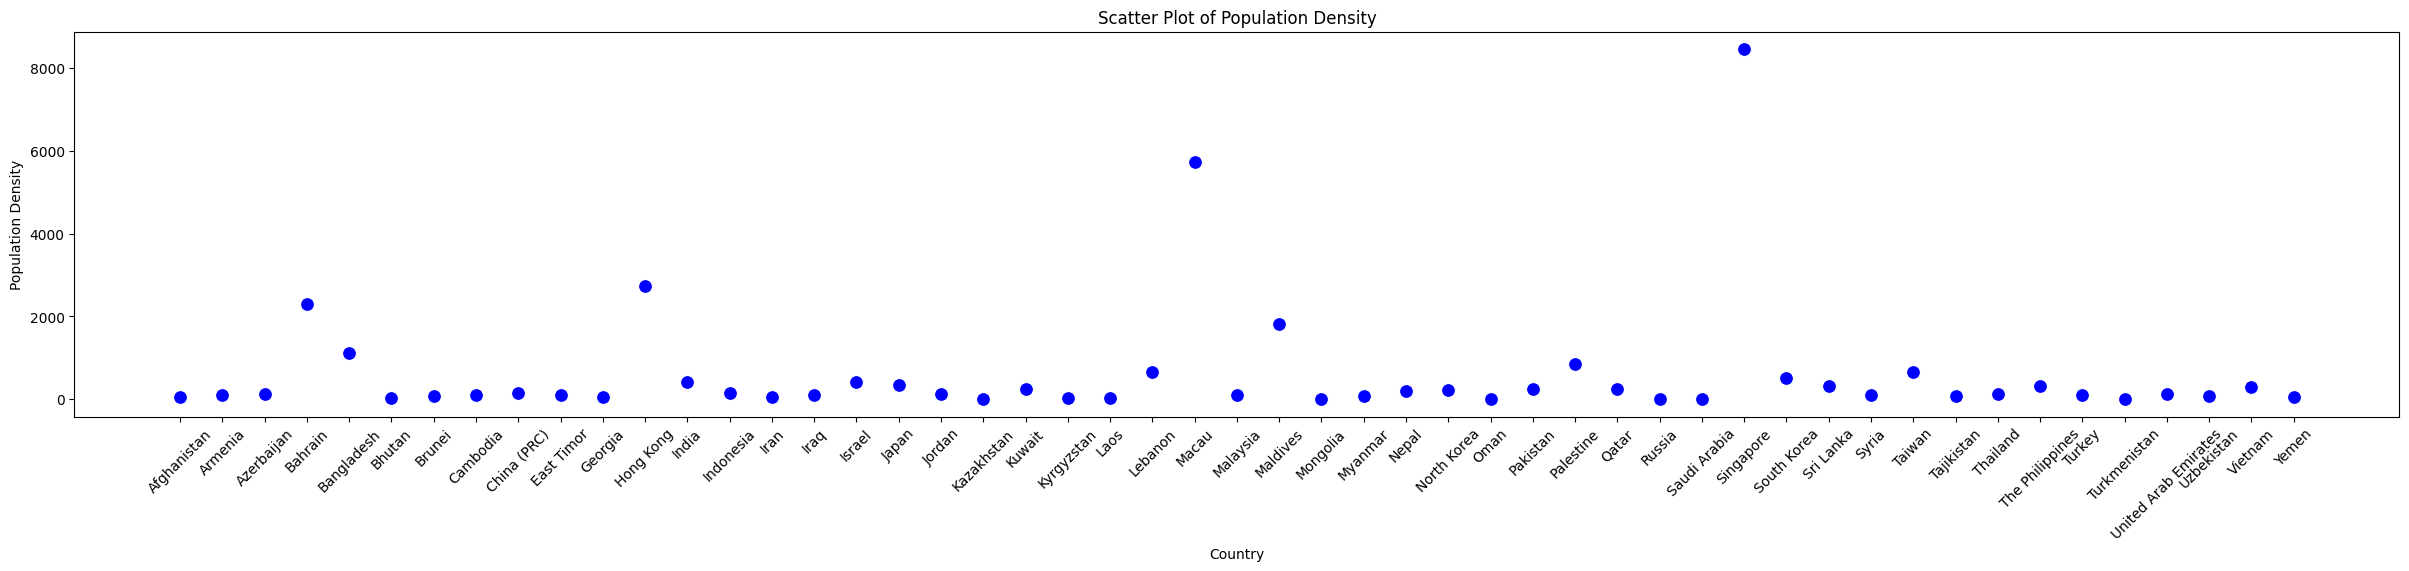

In [27]:
plt.figure(figsize=(30, 5))
sns.scatterplot(x=df["Country"], y=df["Population_Density"], color="blue", s=100)
plt.xlabel("Country")
plt.ylabel("Population Density")
plt.title("Scatter Plot of Population Density")
plt.xticks(rotation=45)
plt.show()

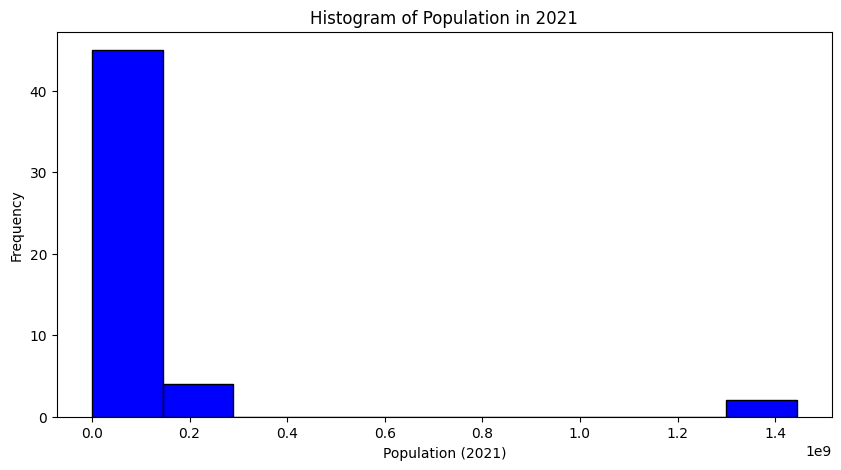

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df['Population (2021)'], bins=10, color='blue', edgecolor='black')  # Adjust bins as needed
plt.xlabel("Population (2021)")
plt.ylabel("Frequency")
plt.title("Histogram of Population in 2021")
plt.show()


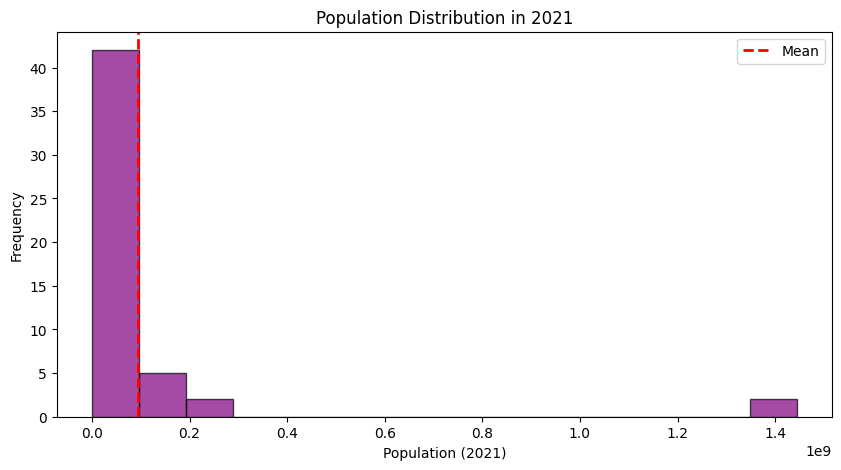

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(df['Population (2021)'], bins=15, color='purple', alpha=0.7, edgecolor='black')  # More bins and transparency
plt.axvline(df['Population (2021)'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.xlabel("Population (2021)")
plt.ylabel("Frequency")
plt.title("Population Distribution in 2021")
plt.show()


In [38]:
# GDP AND GDP PERCAPITA.

In [42]:
print(gdp_txt[:100])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la


In [43]:
soup1 = BeautifulSoup(gdp_txt)

In [49]:
tables = soup1.find_all('table')
print(tables[0])

<table class="wikitable">
<tbody><tr>
<th>Region<br/>rank
</th>
<th>Country/Territory
</th>
<th>2024 GDP (nominal) in billions
</th></tr>
<tr>
<td>—
</td>
<td><b><a href="/wiki/Asia" title="Asia">Asia</a></b>
</td>
<td><b>42.72 trillion</b>
</td></tr>
<tr>
<td>1
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/China" title="C

In [50]:
gdp_table = tables[0]
headers = [th.text.strip() for th in gdp_table.find_all('th')]
headers

['Regionrank', 'Country/Territory', '2024 GDP (nominal) in billions']

In [52]:
data = []
for row in gdp_table.find_all('tr')[1:]:
    cols = [td.text.strip() for td in row.find_all('td')]
    data.append(cols)
data[:10]

[['—', 'Asia', '42.72 trillion'],
 ['1', 'China', '18.53  trillion[2]'],
 ['2', 'Japan', '4.07  trillion[3]'],
 ['3', 'India', '3.88  trillion[4]'],
 ['4', 'Russia', '2.0 trillion'],
 ['5', 'South Korea', '1.76 trillion'],
 ['6', 'Indonesia', '1.47  trillion'],
 ['7', 'Turkey', '1.3 trillion'],
 ['8', 'Saudi Arabia', '1.11  trillion'],
 ['9', 'Taiwan', '803.0 billion']]

In [58]:
import re

def convert_trillion_to_billion(value):
    """Convert a value in trillions to billions."""
    if isinstance(value, str) and 'trillion' in value.lower():
        value = value.lower().replace('trillion', '').strip()
        try:
            num = float(value)
            return round(num * 1000, 2)
        except ValueError:
            return value
    return value
for i in range(len(data)):
    data[i][2] = convert_trillion_to_billion(data[i][2])
for row in data[:10]:
  print(row)


['—', 'Asia', 42720.0]
['1', 'China', 18530.0]
['2', 'Japan', 4070.0000000000005]
['3', 'India', 3880.0]
['4', 'Russia', 2000.0]
['5', 'South Korea', 1760.0]
['6', 'Indonesia', 1470.0]
['7', 'Turkey', 1300.0]
['8', 'Saudi Arabia', 1110.0]
['9', 'Taiwan', 803.0]


In [59]:
gdp_df = pd.DataFrame(data, columns=headers)
print(gdp_df.head())

  Regionrank Country/Territory  2024 GDP (nominal) in billions
0          —              Asia                         42720.0
1          1             China                         18530.0
2          2             Japan                          4070.0
3          3             India                          3880.0
4          4            Russia                          2000.0


In [88]:
df['GDP'] = gdp_df['2024 GDP (nominal) in billions']
df.head(10)

,Country,Capital,Area_km2,Population_(2021),Population_Density,GDP
0,Afghanistan,Kabul,652864,39835428,61.016426,42720.0
1,Armenia,Yerevan,29743,2968127,99.792455,18530.0
2,Azerbaijan,Baku,86600,10223342,118.052448,4070.0
3,Bahrain,Manama,760,1748296,2300.389474,3880.0
4,Bangladesh,Dhaka,147570,166303498,1126.946520,2000.0
5,Bhutan,Thimphu,38394,779898,20.313018,1760.0
6,Brunei,Bandar Seri Begawan,5765,441532,76.588378,1470.0
7,Cambodia,Phnom Penh,181035,16946438,93.608628,1300.0
8,China (PRC),Beijing,9596961,1444216107,150.486816,1110.0
9,East Timor,Dili,14874,1343873,90.350477,803.0


In [96]:
# print(df.isnull().sum())
# print(df.dtypes)
print(len(df['Population_(2021)']))
df['Total GDP'] = df['GDP'] * df['Population_(2021)']

# print(df[['Country', 'GDP', 'Population (2021)', 'Total GDP']])
df.head()

51


,Country,Capital,Area_km2,Population_(2021),Population_Density,GDP,Total GDP
0,Afghanistan,Kabul,652864,39835428,61.016426,42720.0,1.701769e+12
1,Armenia,Yerevan,29743,2968127,99.792455,18530.0,5.499939e+10
2,Azerbaijan,Baku,86600,10223342,118.052448,4070.0,4.160900e+10
3,Bahrain,Manama,760,1748296,2300.389474,3880.0,6.783388e+09
4,Bangladesh,Dhaka,147570,166303498,1126.946520,2000.0,3.326070e+11


In [98]:
df['GDP_per_capita'] = df['Total GDP'] / df['Population_(2021)']

df.head()


,Country,Capital,Area_km2,Population_(2021),Population_Density,GDP,Total GDP,GDP_per_capita
0,Afghanistan,Kabul,652864,39835428,61.016426,42720.0,1.701769e+12,42720.0
1,Armenia,Yerevan,29743,2968127,99.792455,18530.0,5.499939e+10,18530.0
2,Azerbaijan,Baku,86600,10223342,118.052448,4070.0,4.160900e+10,4070.0
3,Bahrain,Manama,760,1748296,2300.389474,3880.0,6.783388e+09,3880.0
4,Bangladesh,Dhaka,147570,166303498,1126.946520,2000.0,3.326070e+11,2000.0


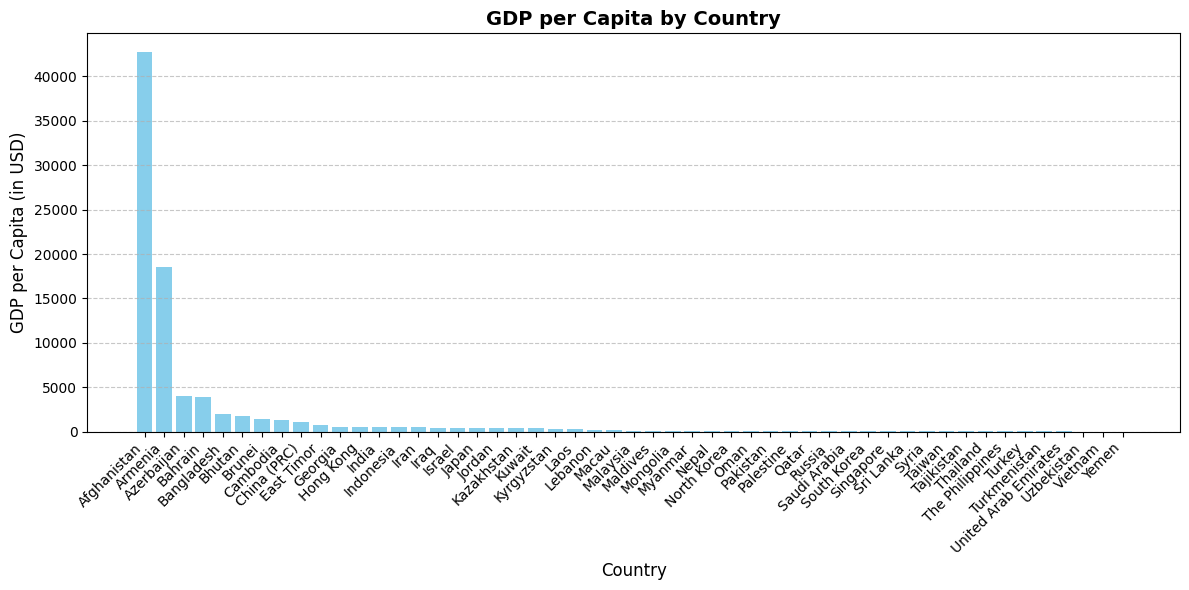

In [99]:
import matplotlib.pyplot as plt

# Sorting DataFrame by GDP per capita for better visualization
df_sorted = df.sort_values(by='GDP_per_capita', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Country'], df_sorted['GDP_per_capita'], color='skyblue')

plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP per Capita (in USD)", fontsize=12)
plt.title("GDP per Capita by Country", fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

plt.tight_layout()
plt.show()




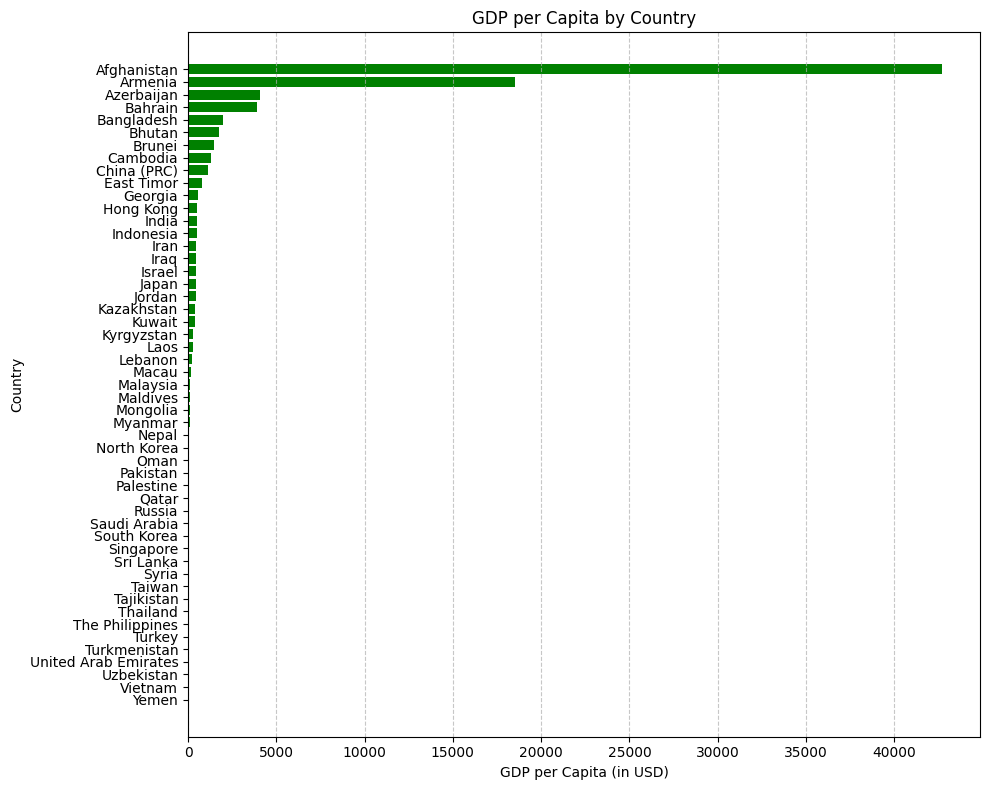

In [100]:
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['Country'], df_sorted['GDP_per_capita'], color='green')

plt.xlabel("GDP per Capita (in USD)")
plt.ylabel("Country")
plt.title("GDP per Capita by Country")

plt.gca().invert_yaxis()  # Highest GDP per capita at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


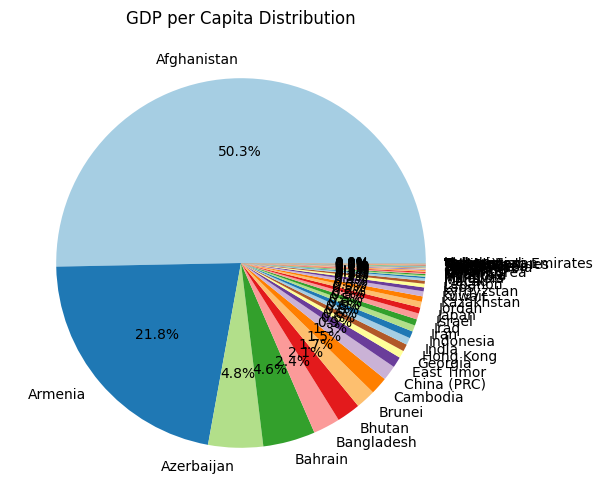

In [101]:
plt.figure(figsize=(10, 6))
plt.pie(df_sorted['GDP_per_capita'], labels=df_sorted['Country'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

plt.title("GDP per Capita Distribution")
plt.show()


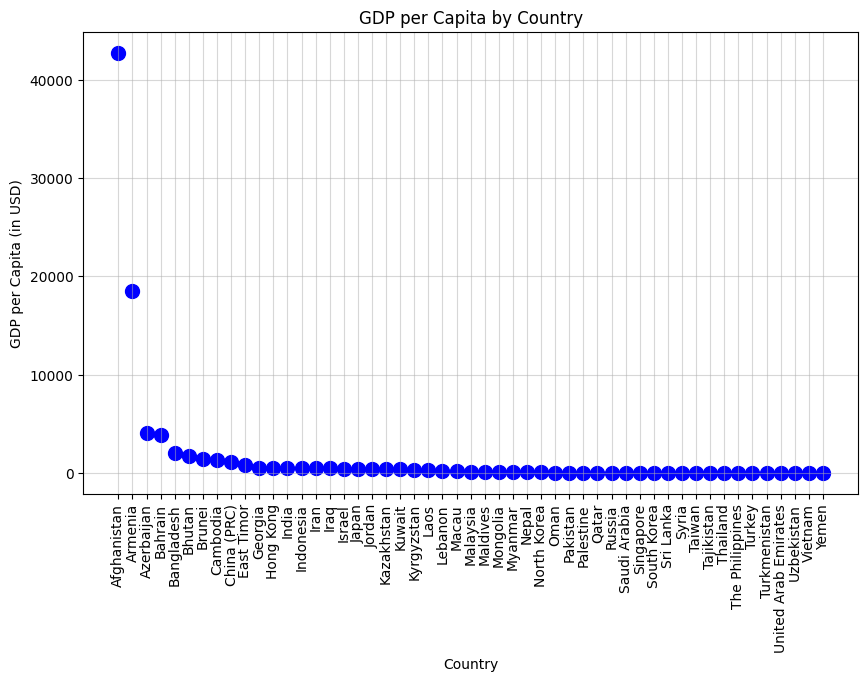

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Country'], df['GDP_per_capita'], color='blue', s=100)

plt.xlabel("Country")
plt.ylabel("GDP per Capita (in USD)")
plt.title("GDP per Capita by Country")

plt.xticks(rotation=90)
plt.grid(alpha=0.5)

plt.show()
